In [1]:
#Automated reloading of custom modules
%load_ext autoreload
%autoreload 2

#Standard modules
import os
import time
import random

import numpy as np
import scipy

import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from datetime import datetime

#Custom modules
import helpers as hlp
import models as mdl
from run import run

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [42]:
def benchmark(n_clients, dataset, model, alpha="uniform", rounds=100, 
              batch_size=32, epoch_per_round=1, lr=1e-3, optimizer="adam", feature_dim=100, 
              n_avg=None, lambda_kd=1.0, lambda_disc=1.0, sizes=None, reduced=False, 
              track_history=1, export_dir=None, data_dir="./data",
              device=None, seed=0):
    """Benchmark privateKD with FedAvg, FD and independent learning."""
    
    print("Running private KD")
    pt_pkd = run(n_clients=n_clients, dataset=dataset, model=model, alpha=alpha, rounds=rounds, 
                 batch_size=batch_size, epoch_per_round=epoch_per_round, lr=lr, optimizer=optimizer, 
                 feature_dim=feature_dim, n_avg=n_avg, lambda_kd=lambda_kd, lambda_disc=lambda_disc, 
                 kd_type="feature", sizes=sizes, reduced=reduced, track_history=track_history, 
                 fed_avg=False, export_dir=export_dir, data_dir=data_dir, device=device, seed=seed)
    print("Running FedAvg")
    pt_fl = run(n_clients=n_clients, dataset=dataset, model=model, alpha=alpha, rounds=rounds, 
                batch_size=batch_size, epoch_per_round=epoch_per_round, lr=lr, optimizer=optimizer, 
                feature_dim=feature_dim, lambda_kd=0, lambda_disc=0, sizes=sizes, reduced=reduced, 
                track_history=track_history, 
                fed_avg="model", export_dir=export_dir, data_dir=data_dir, device=device, seed=seed)
    print("Running FD")
    pt_fd = run(n_clients=n_clients, dataset=dataset, model=model, alpha=alpha, rounds=rounds, 
                batch_size=batch_size, epoch_per_round=epoch_per_round, lr=lr, optimizer=optimizer, 
                feature_dim=feature_dim, n_avg=None, lambda_kd=lambda_kd, lambda_disc=0, 
                kd_type="output", sizes=sizes, reduced=reduced, track_history=track_history, 
                fed_avg=False, export_dir=export_dir, data_dir=data_dir, device=device, seed=seed)
    print("Running independent learning")
    pt_il = run(n_clients=n_clients, dataset=dataset, model=model, alpha=alpha, rounds=rounds, 
                batch_size=batch_size, epoch_per_round=epoch_per_round, lr=lr, optimizer=optimizer, 
                feature_dim=feature_dim, n_avg=None, lambda_kd=0, lambda_disc=0,
                sizes=sizes, reduced=reduced, track_history=track_history, 
                fed_avg=False, export_dir=export_dir, data_dir=data_dir, device=device, seed=seed)
    
    return pt_pkd, pt_fl, pt_fd, pt_il


Running private KD
Device: cuda
** Using MNIST **
Load train data...
Load validation data...
Dataset sizes:
	- Train: (6000, 1, 28, 28) (18.864 MB)
	- Validation (1000, 1, 28, 28) (3.144 MB)
Round 50 done. (3.9s)      
Done.
Running FedAvg
Device: cuda
** Using MNIST **
Load train data...
Load validation data...
Dataset sizes:
	- Train: (6000, 1, 28, 28) (18.864 MB)
	- Validation (1000, 1, 28, 28) (3.144 MB)
Round 50 done. (1.8s)      
Done.
Running FD
Device: cuda
** Using MNIST **
Load train data...
Load validation data...
Dataset sizes:
	- Train: (6000, 1, 28, 28) (18.864 MB)
	- Validation (1000, 1, 28, 28) (3.144 MB)
Round 50 done. (1.9s)      
Done.
Running independent learning
Device: cuda
** Using MNIST **
Load train data...
Load validation data...
Dataset sizes:
	- Train: (6000, 1, 28, 28) (18.864 MB)
	- Validation (1000, 1, 28, 28) (3.144 MB)
Round 50 done. (1.7s)      
Done.
Running private KD
Device: cuda
** Using MNIST **
Load train data...
Load validation data...
Dataset s

/u/fberdoz/MIT-master-thesis/helpers.py:702: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=(6, 6))


Round 50 done. (1.6s)      
Done.
Running private KD
Device: cuda
** Using MNIST **
Load train data...
Load validation data...
Dataset sizes:
	- Train: (6000, 1, 28, 28) (18.864 MB)
	- Validation (1000, 1, 28, 28) (3.144 MB)
Round 50 done. (3.5s)      
Done.
Running FedAvg
Device: cuda
** Using MNIST **
Load train data...
Load validation data...
Dataset sizes:
	- Train: (6000, 1, 28, 28) (18.864 MB)
	- Validation (1000, 1, 28, 28) (3.144 MB)
Round 50 done. (1.5s)      
Done.
Running FD
Device: cuda
** Using MNIST **
Load train data...
Load validation data...
Dataset sizes:
	- Train: (6000, 1, 28, 28) (18.864 MB)
	- Validation (1000, 1, 28, 28) (3.144 MB)
Round 50 done. (2.7s)      
Done.
Running independent learning
Device: cuda
** Using MNIST **
Load train data...
Load validation data...
Dataset sizes:
	- Train: (6000, 1, 28, 28) (18.864 MB)
	- Validation (1000, 1, 28, 28) (3.144 MB)
Round 50 done. (1.8s)      
Done.
Running private KD
Device: cuda
** Using MNIST **
Load train data...

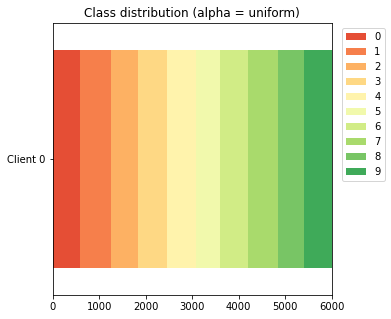

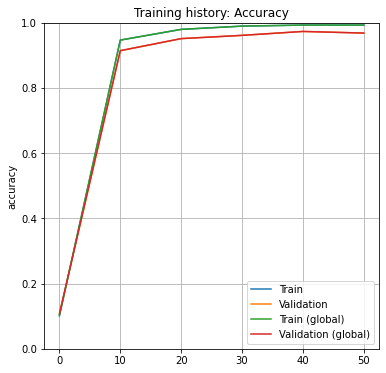

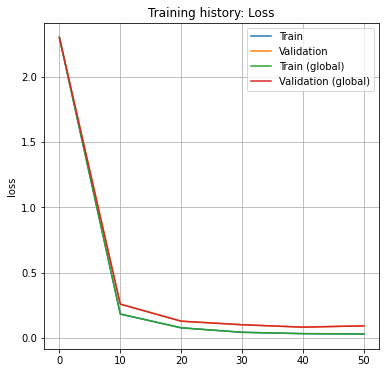

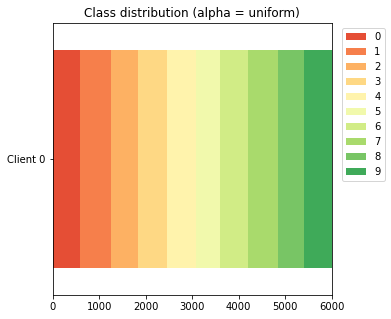

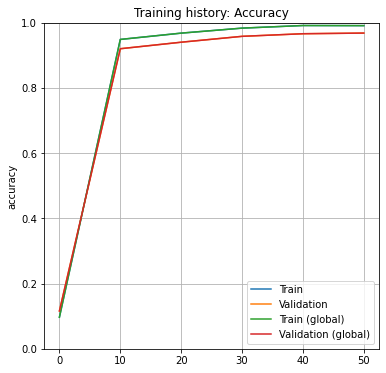

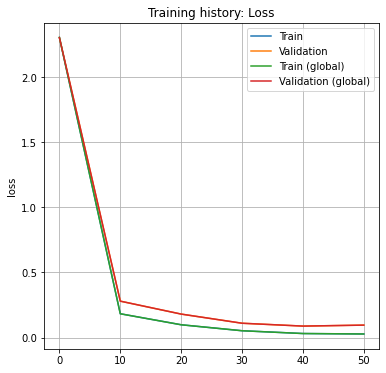

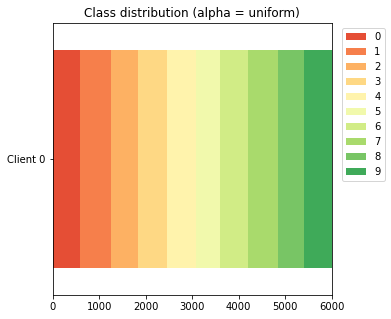

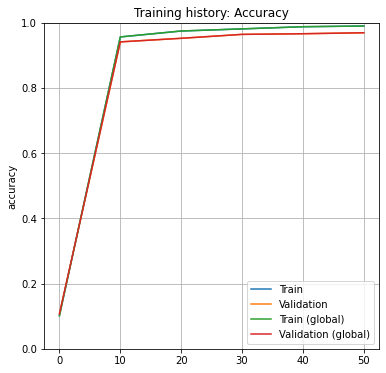

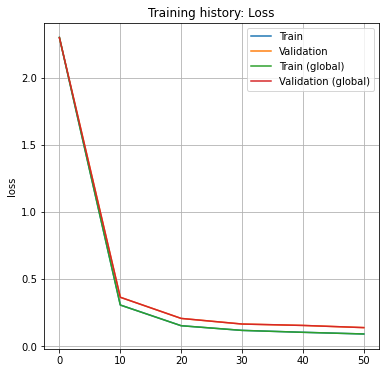

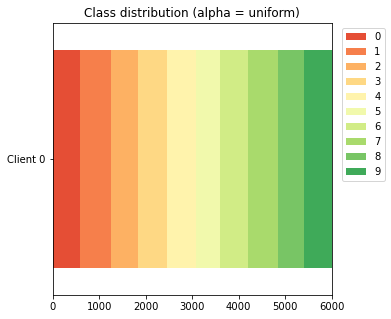

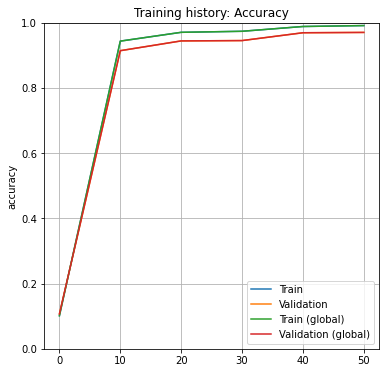

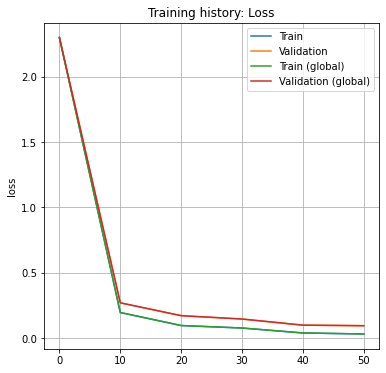

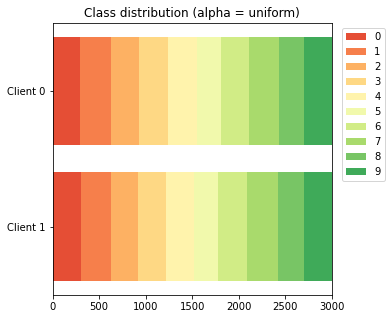

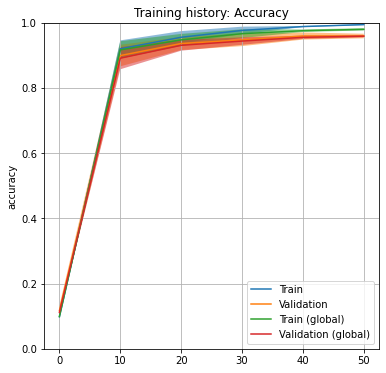

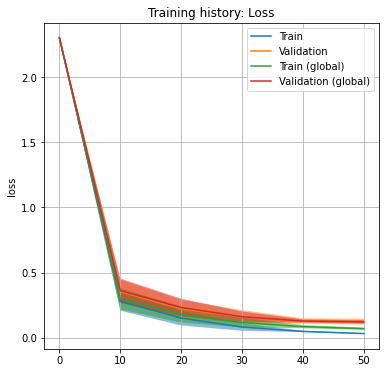

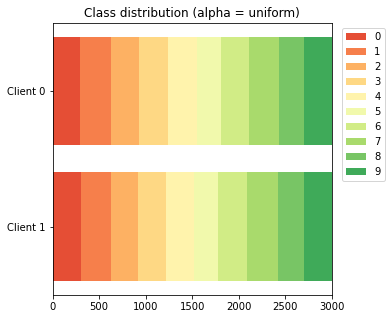

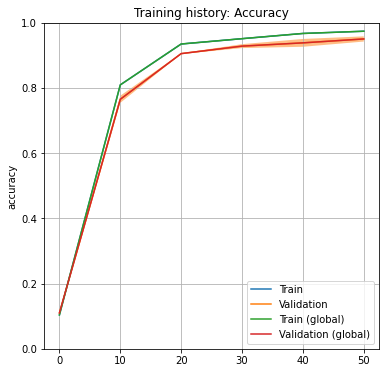

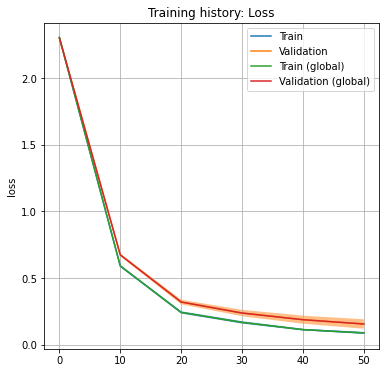

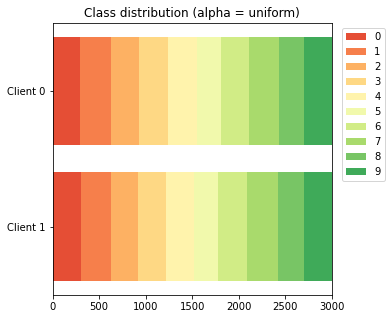

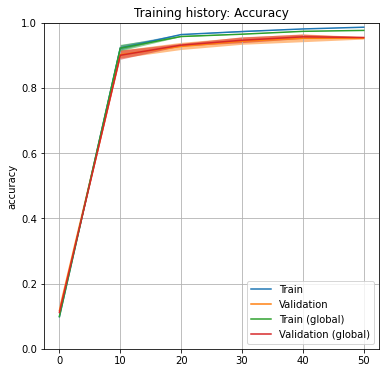

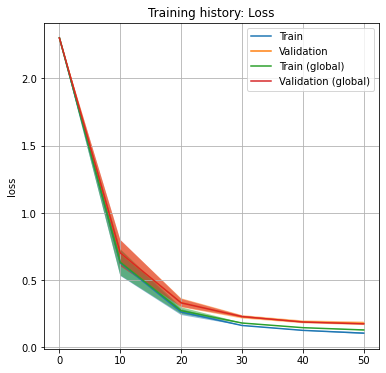

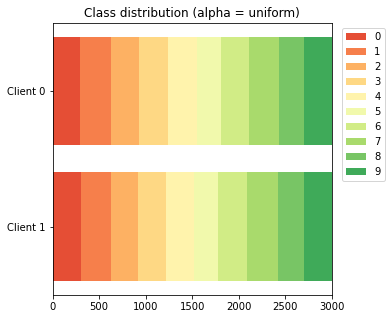

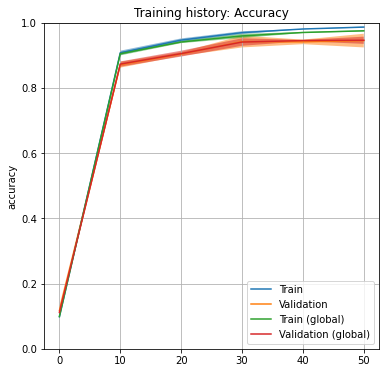

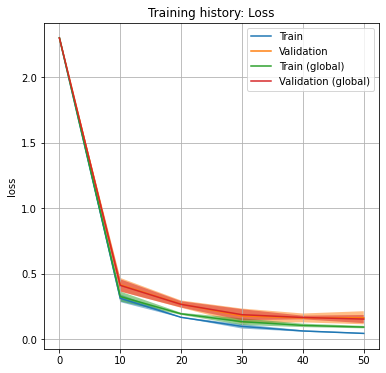

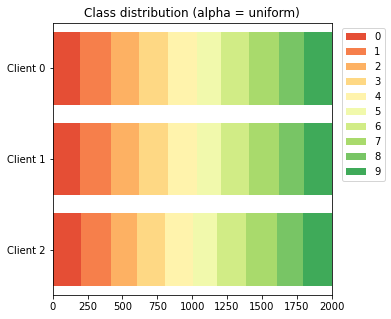

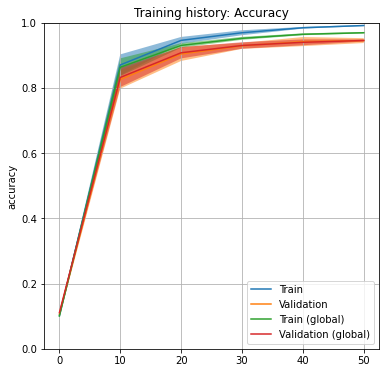

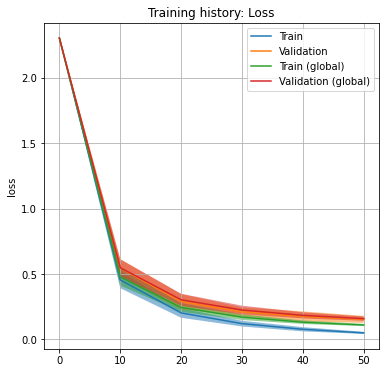

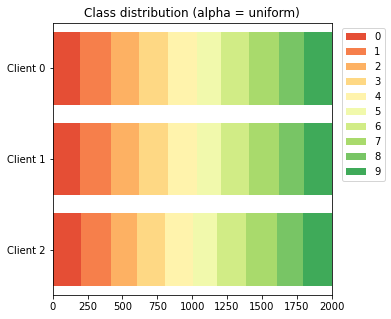

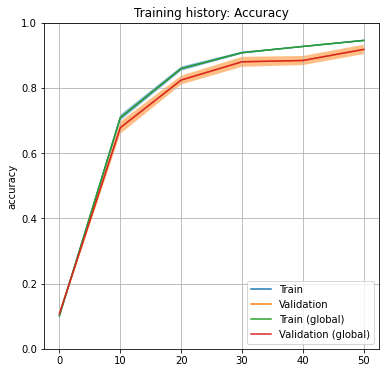

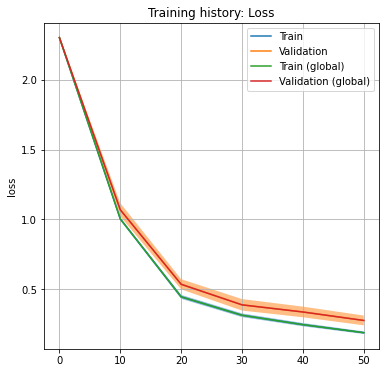

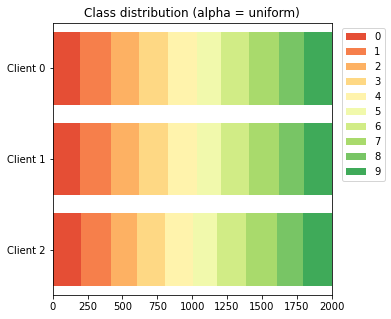

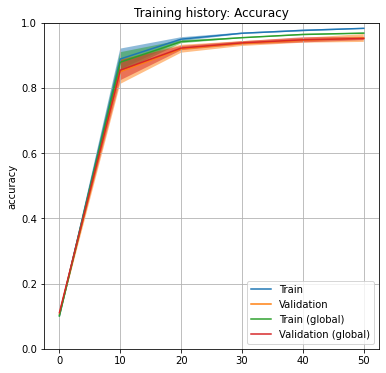

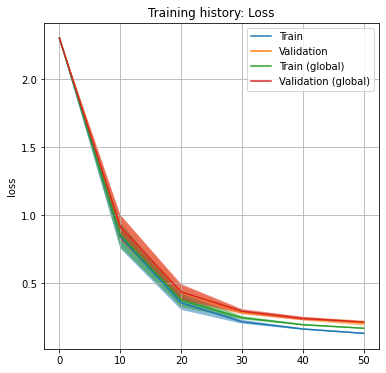

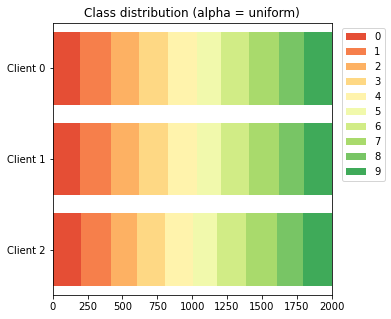

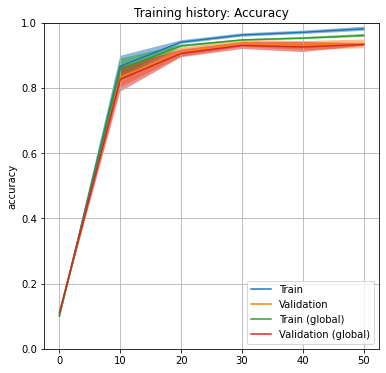

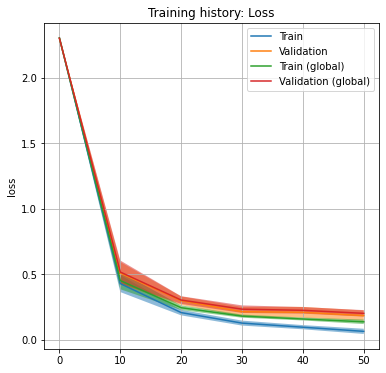

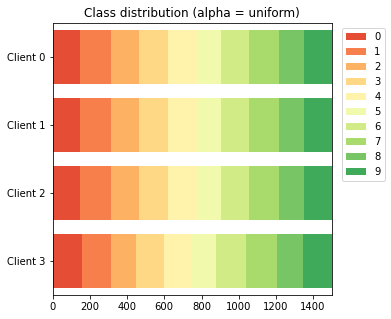

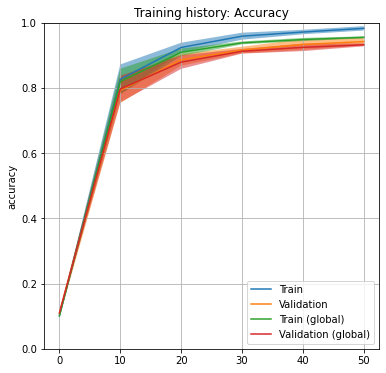

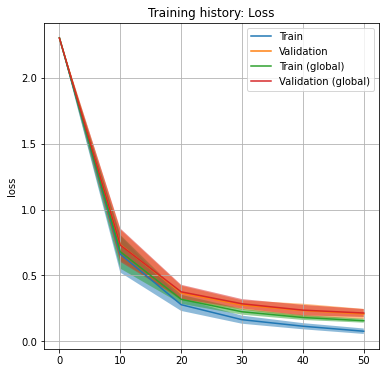

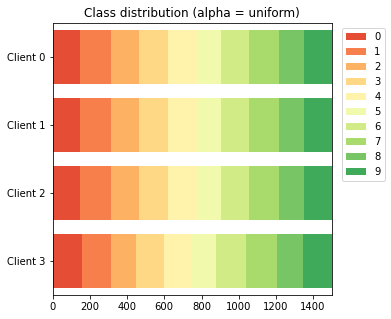

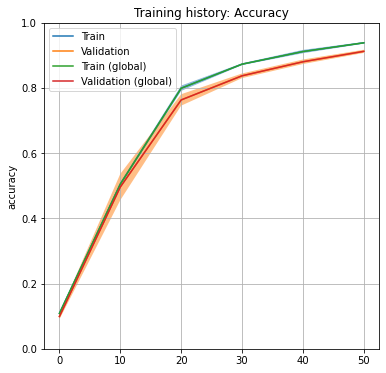

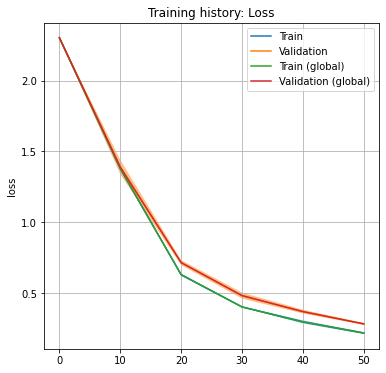

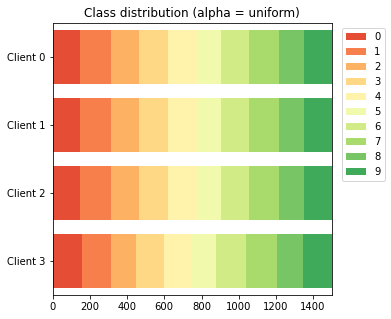

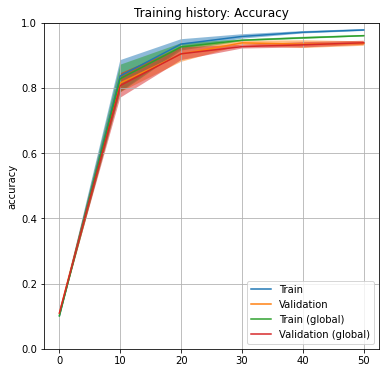

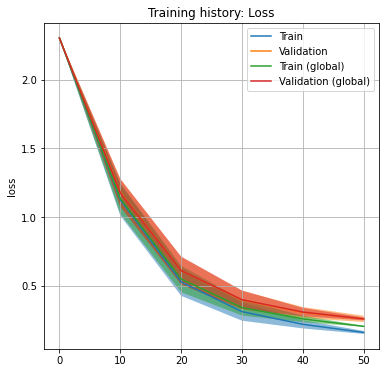

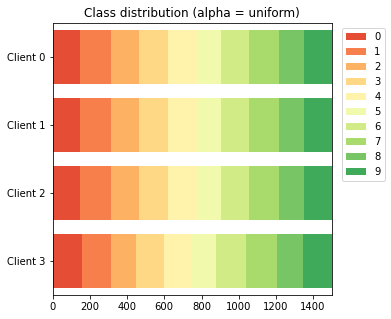

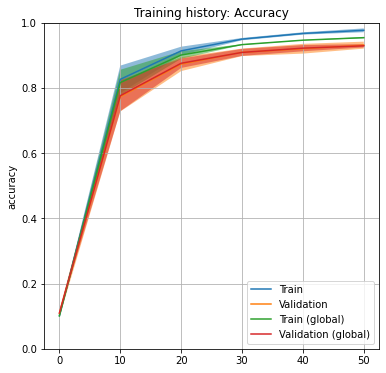

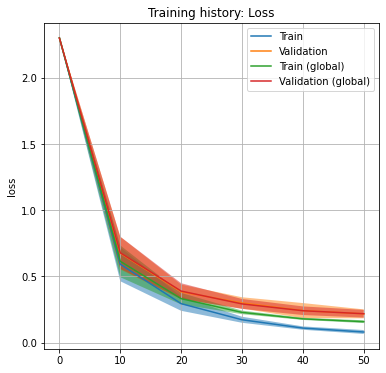

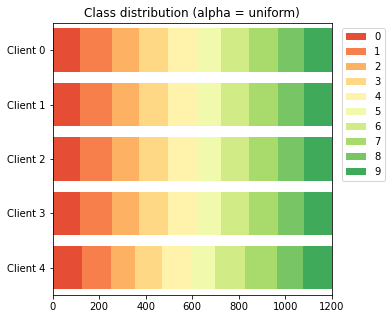

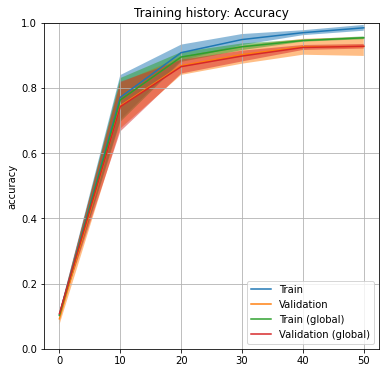

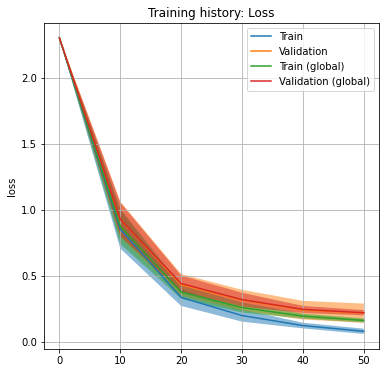

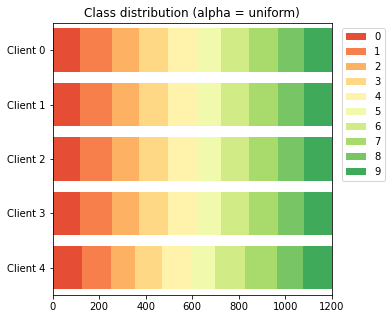

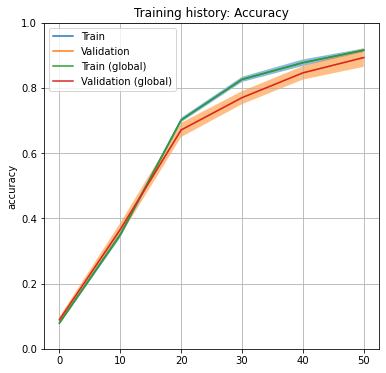

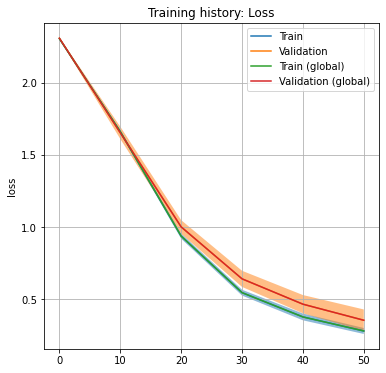

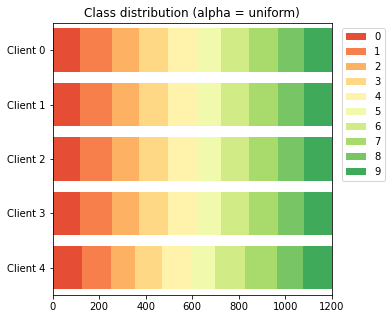

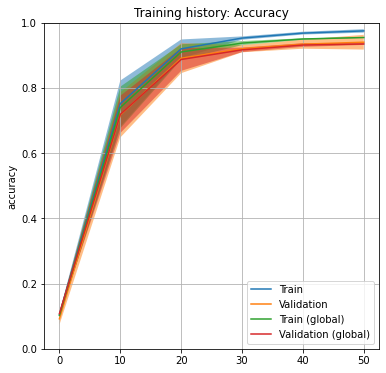

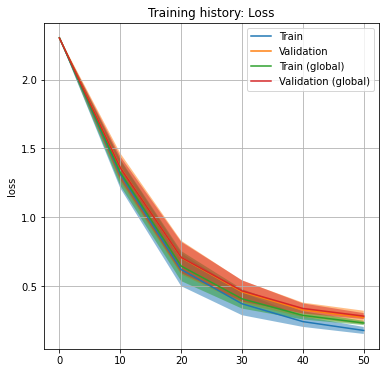

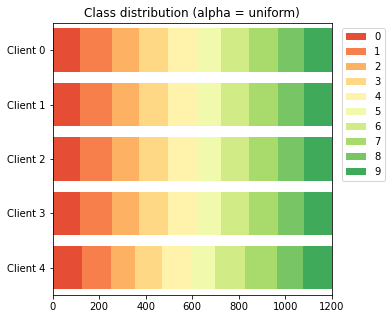

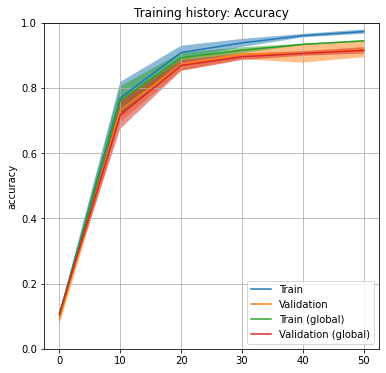

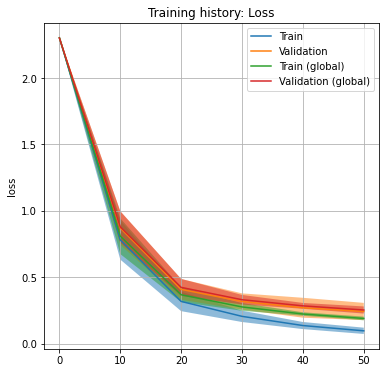

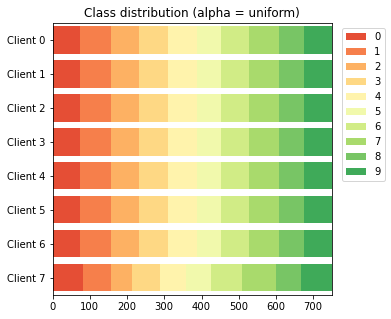

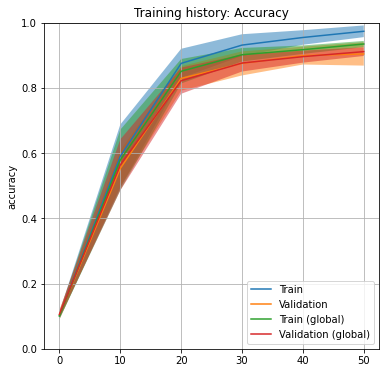

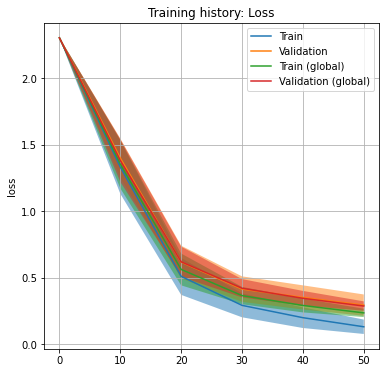

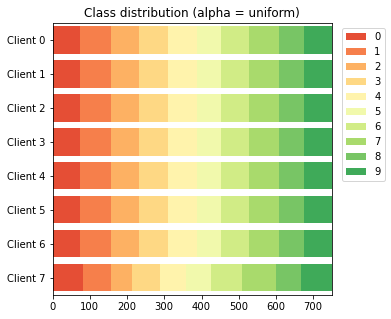

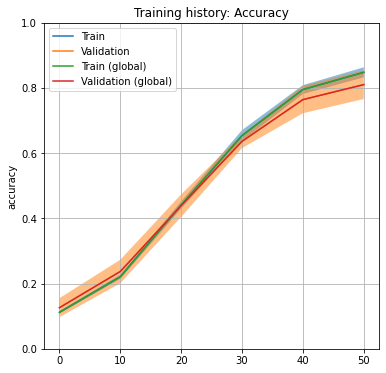

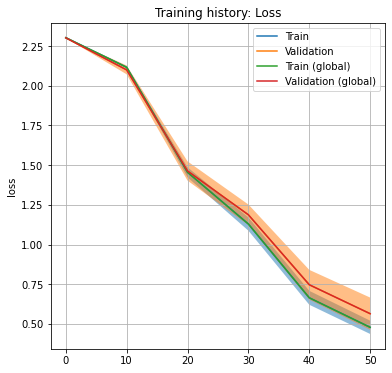

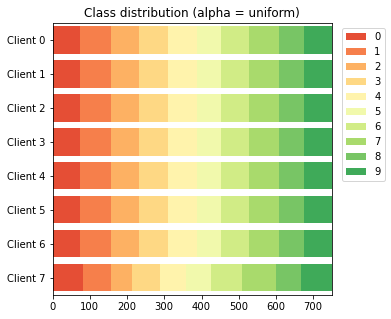

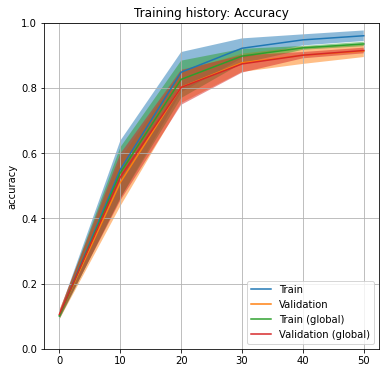

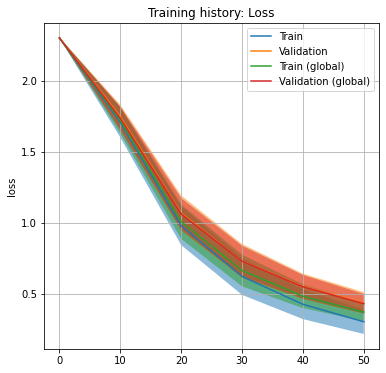

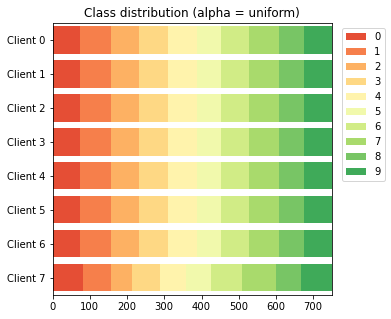

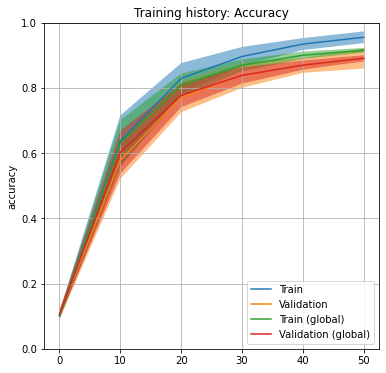

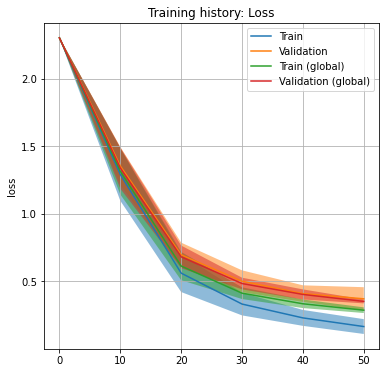

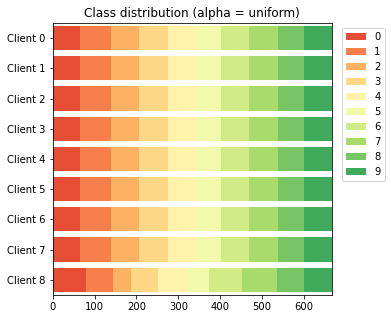

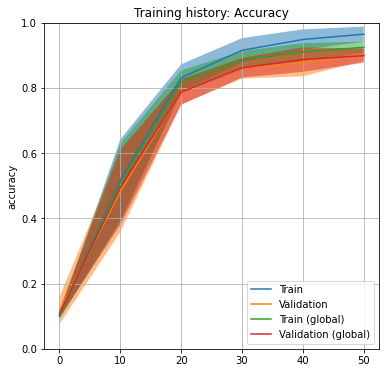

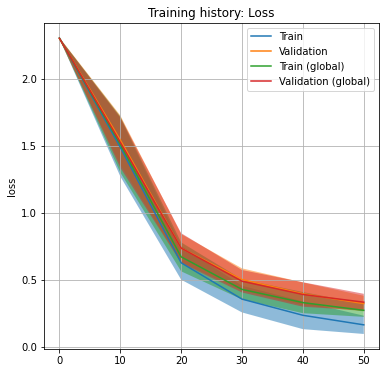

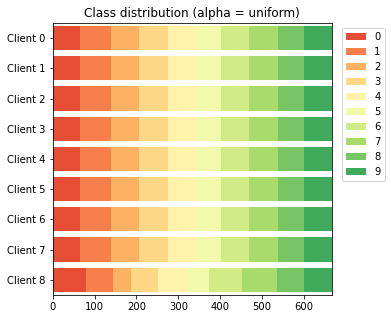

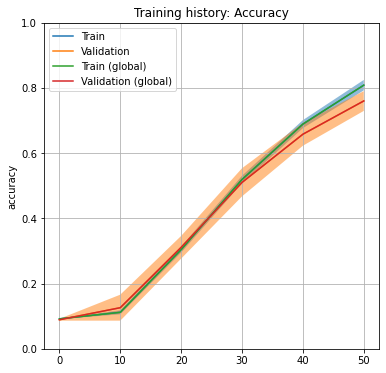

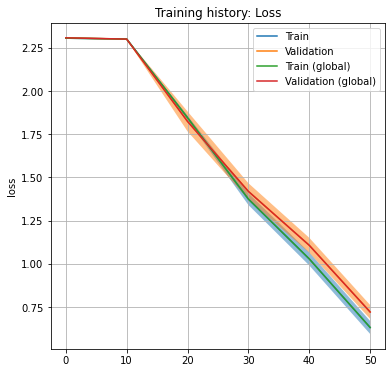

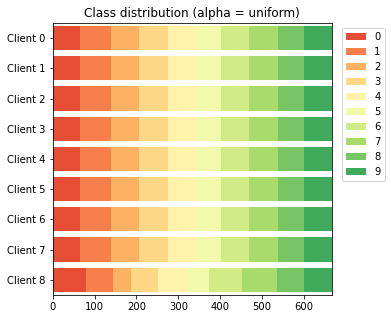

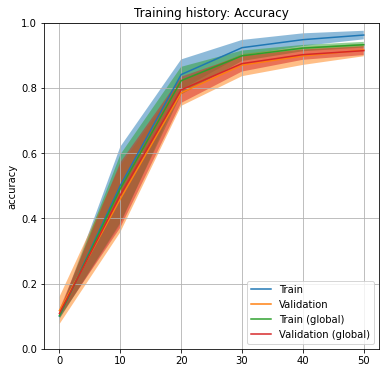

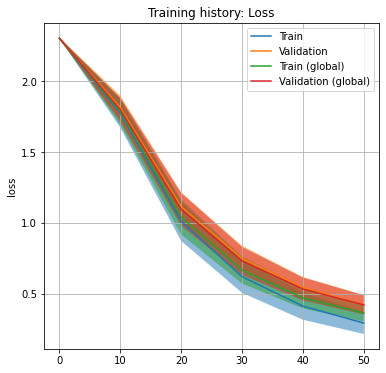

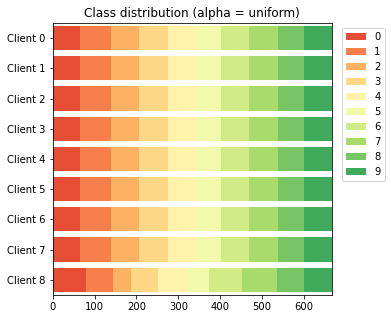

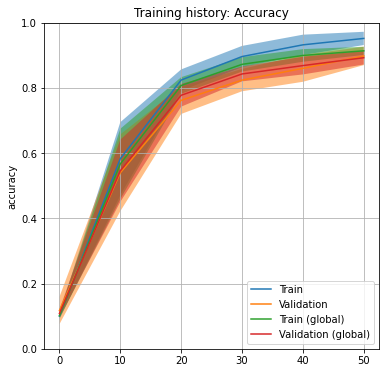

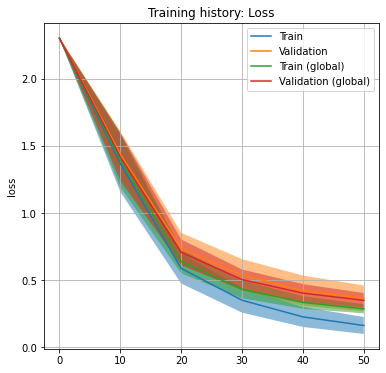

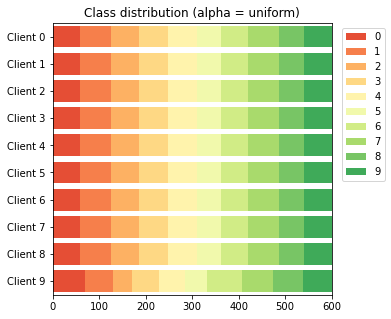

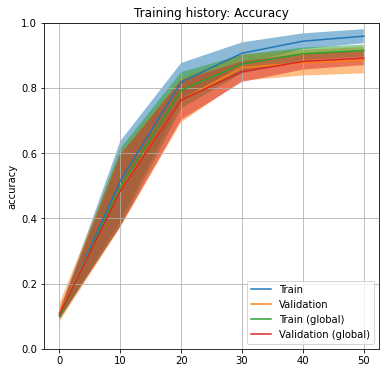

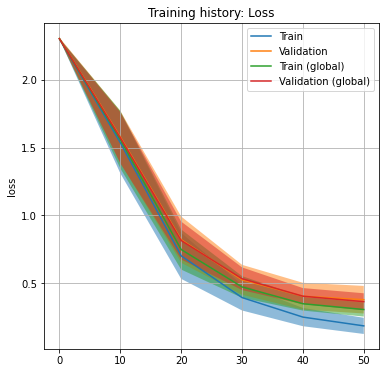

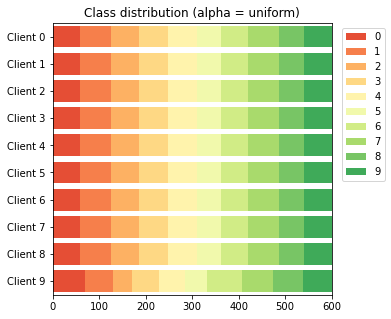

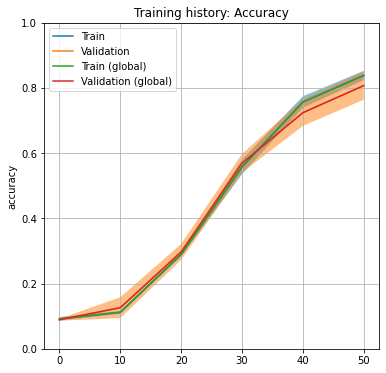

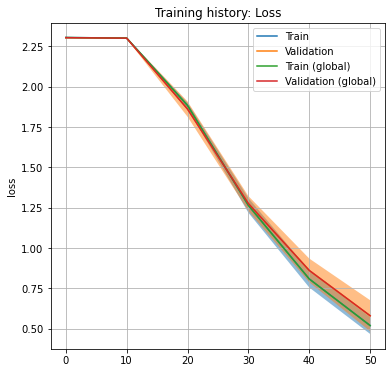

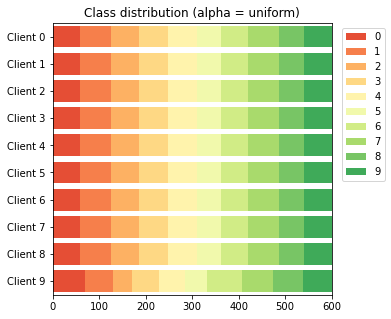

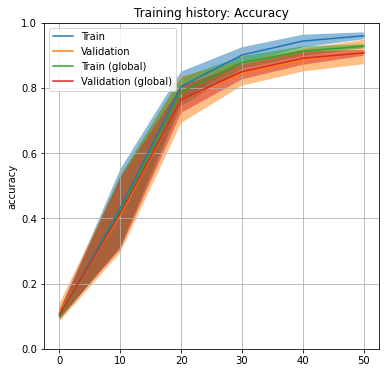

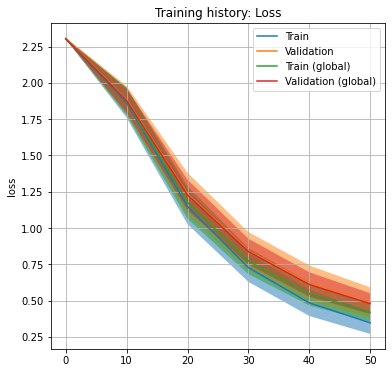

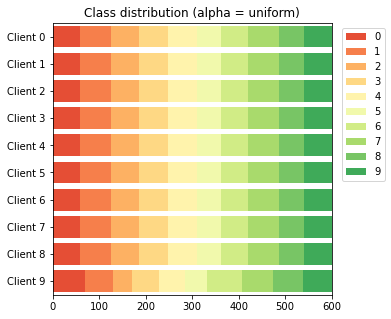

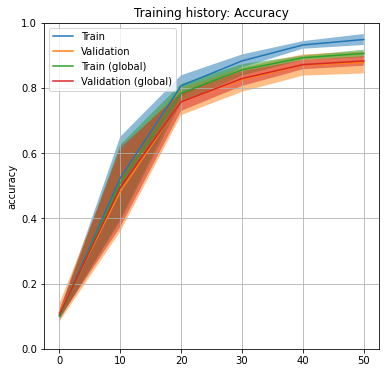

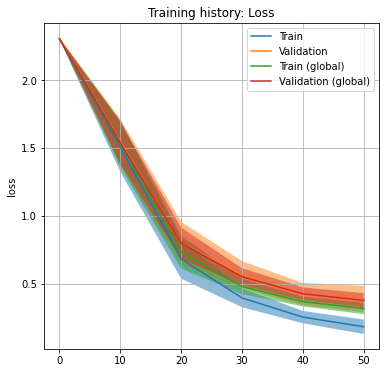

In [78]:
# Figure MNIST
dataset = "MNIST"
model = "LeNet5"
reduced = 0.1
rounds = 50
n_avg=16
track_history = 10
export_dir = None

# Experiment
pt_kd_list = []
pt_fl_list = []
pt_fd_list = [] 
pt_il_list = []
for n_clients in [1,2,3,4,5,6,7,8,9,10]:
    pt_kd, pt_fl, pt_fd, pt_il = benchmark(n_clients=n_clients, dataset=dataset, model=model, reduced=reduced, n_avg=n_avg, rounds=rounds, track_history=track_history, export_dir=export_dir)
    #pt = run(n_clients=n_clients, dataset=dataset, model=model, reduced=reduced, n_avg=n_avg, rounds=rounds, track_history=track_history, export_dir=export_dir)
    pt_kd_list.append(pt_kd)
    pt_fl_list.append(pt_fl)
    pt_fd_list.append(pt_fd)
    pt_il_list.append(pt_il)

Running private KD
Device: cuda
** Using MNIST **
Load train data...
Load validation data...
Dataset sizes:
	- Train: (6000, 1, 28, 28) (18.864 MB)
	- Validation (1000, 1, 28, 28) (3.144 MB)
Round 50 done. (4.8s)      
Done.
Running FedAvg
Device: cuda
** Using MNIST **
Load train data...
Load validation data...
Dataset sizes:
	- Train: (6000, 1, 28, 28) (18.864 MB)
	- Validation (1000, 1, 28, 28) (3.144 MB)
Round 50 done. (3.0s)      
Done.
Running FD
Device: cuda
** Using MNIST **
Load train data...
Load validation data...
Dataset sizes:
	- Train: (6000, 1, 28, 28) (18.864 MB)
	- Validation (1000, 1, 28, 28) (3.144 MB)
Round 50 done. (3.7s)      
Done.
Running independent learning
Device: cuda
** Using MNIST **
Load train data...
Load validation data...
Dataset sizes:
	- Train: (6000, 1, 28, 28) (18.864 MB)
	- Validation (1000, 1, 28, 28) (3.144 MB)
Round 50 done. (2.9s)      
Done.
Running private KD
Device: cuda
** Using MNIST **
Load train data...
Load validation data...
Dataset s

/u/fberdoz/MIT-master-thesis/helpers.py:702: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=(6, 6))


Round 50 done. (3.4s)      
Done.


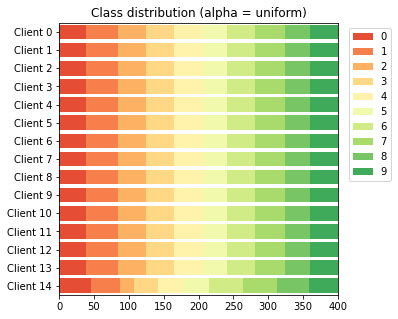

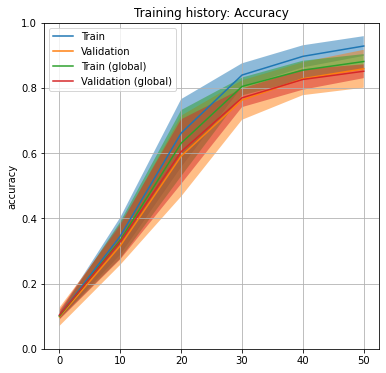

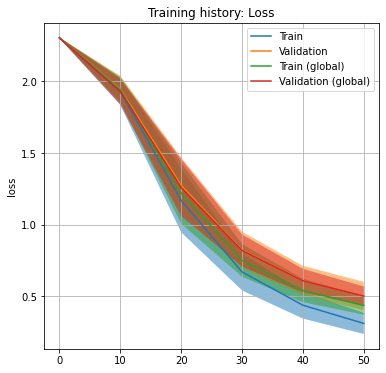

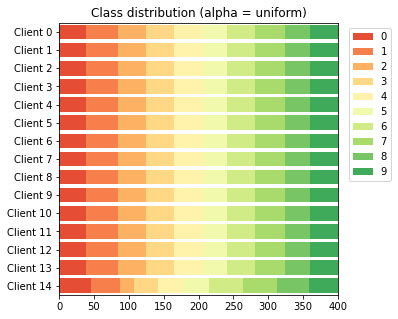

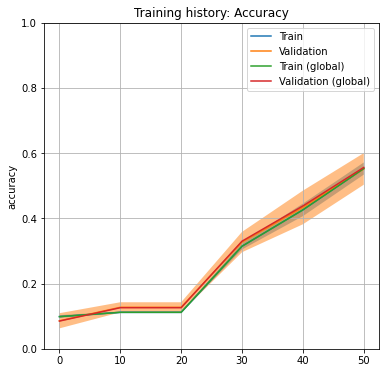

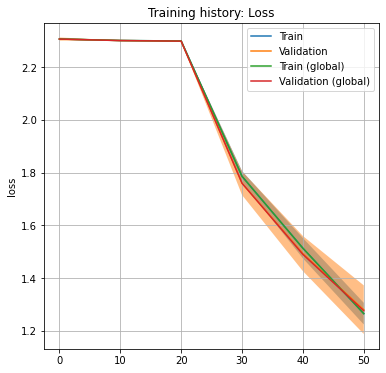

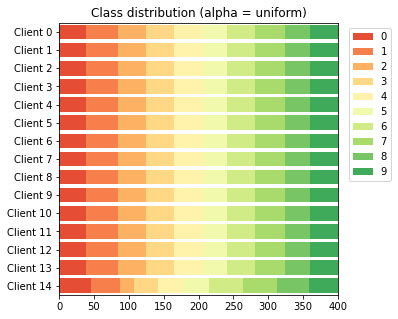

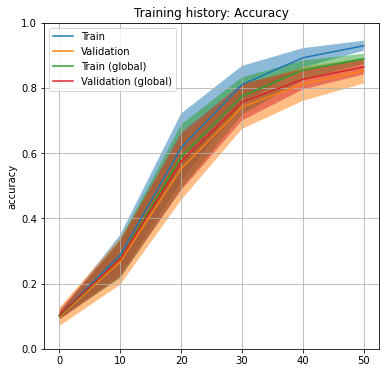

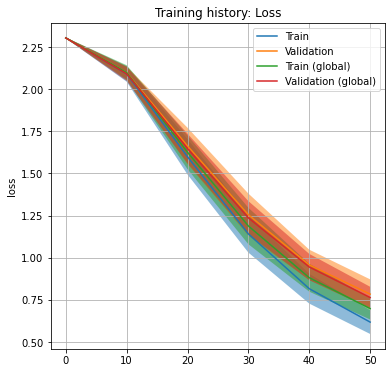

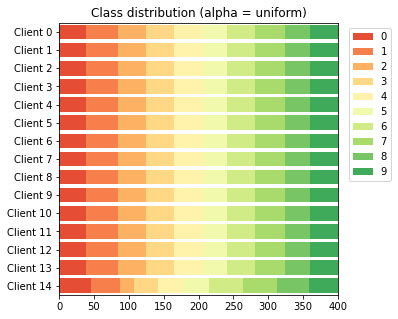

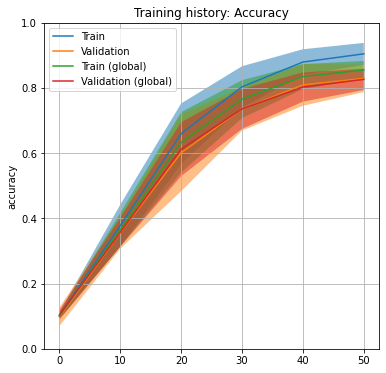

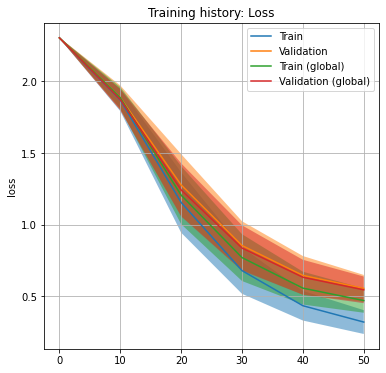

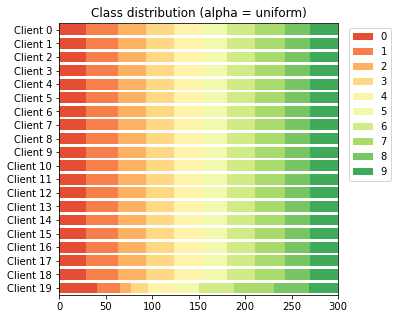

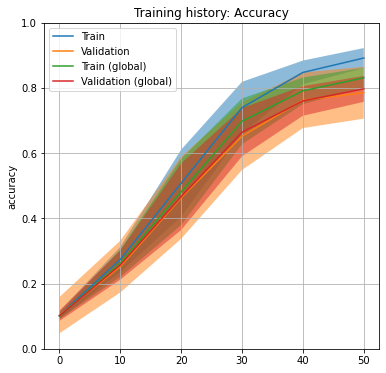

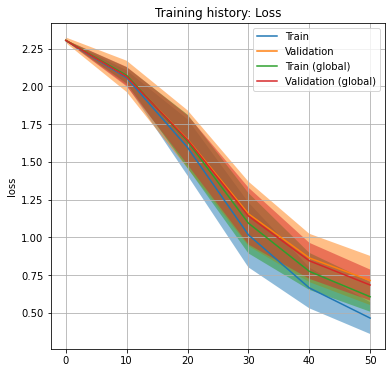

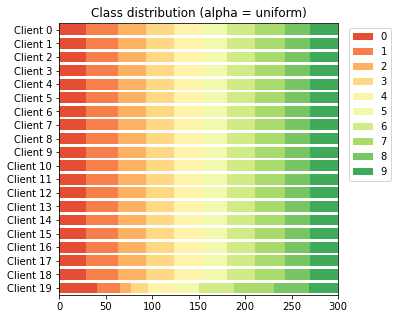

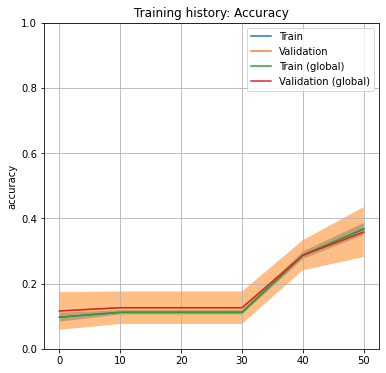

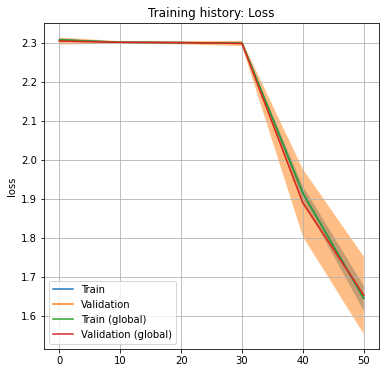

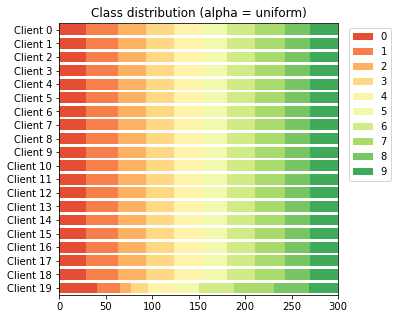

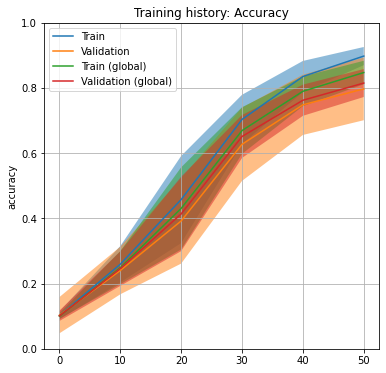

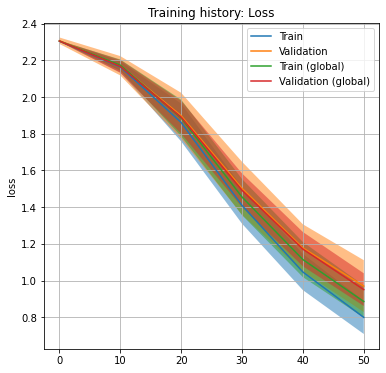

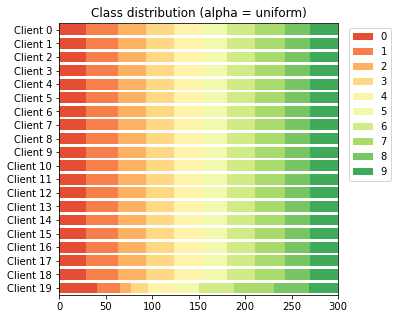

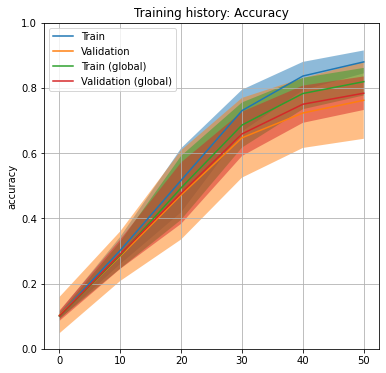

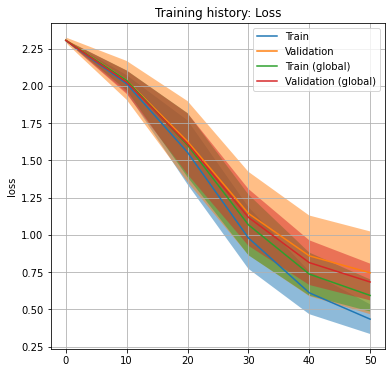

In [133]:
# Experiment
pt_kd_list_tmp = []
pt_fl_list_tmp = []
pt_fd_list_tmp = [] 
pt_il_list_tmp = []
for n_clients in [15, 20]:
    pt_kd, pt_fl, pt_fd, pt_il = benchmark(n_clients=n_clients, dataset=dataset, model=model, reduced=reduced, n_avg=n_avg, rounds=rounds, track_history=track_history, export_dir=export_dir)
    #pt = run(n_clients=n_clients, dataset=dataset, model=model, reduced=reduced, n_avg=n_avg, rounds=rounds, track_history=track_history, export_dir=export_dir)
    pt_kd_list_tmp.append(pt_kd)
    pt_fl_list_tmp.append(pt_fl)
    pt_fd_list_tmp.append(pt_fd)
    pt_il_list_tmp.append(pt_il)

In [187]:
pt_kd, pt_fl, pt_fd, pt_il = benchmark(n_clients=10, dataset=dataset, model=model, reduced=reduced, n_avg=n_avg, rounds=rounds, track_history=track_history, export_dir=export_dir, device="cuda")

Running private KD
Device: cuda
** Using MNIST **
Load train data...
Load validation data...
Dataset sizes:
	- Train: (6000, 1, 28, 28) (18.864 MB)
	- Validation (1000, 1, 28, 28) (3.144 MB)


RuntimeError: CUDA out of memory. Tried to allocate 2.00 MiB (GPU 0; 10.92 GiB total capacity; 2.25 GiB already allocated; 4.44 MiB free; 2.27 GiB reserved in total by PyTorch)

In [189]:
# Data organization
evaluation = "Validation (global)"
metric = "loss"
r = -1

data_kd_mean = []
data_kd_std = []
data_fl_mean = []
data_fl_std = []
data_fd_mean = []
data_fd_std = []
data_il_mean = []
data_il_std = []

for i, (pt_kd, pt_fl, pt_fd, pt_il) in enumerate(zip(pt_kd_list, pt_fl_list, pt_fd_list, pt_il_list)):
    data_kd = np.array([pt.perf_histories[evaluation][metric][r] for pt in pt_kd])
    data_kd_mean.append(data_kd.mean())
    data_kd_std.append(data_kd.std())
    
    data_fl = np.array([pt.perf_histories[evaluation][metric][r] for pt in pt_fl])
    data_fl_mean.append(data_fl.mean())
    data_fl_std.append(data_fl.std())
    
    data_fd = np.array([pt.perf_histories[evaluation][metric][r] for pt in pt_fd])
    data_fd_mean.append(data_fd.mean())
    data_fd_std.append(data_fd.std())
    
    data_il = np.array([pt.perf_histories[evaluation][metric][r] for pt in pt_il])
    data_il_mean.append(data_il.mean())
    data_il_std.append(data_il.std())

fig, ax = plt.subplots(1,1, figsize=(4,4))

ax.errorbar([1,2,3,4,5,6,7,8,9,10], data_kd_mean[:-2], yerr=data_kd_std[:-2], marker="o", label="CFKD")
ax.errorbar([1,2,3,4,5,6,7,8,9,10], data_fl_mean[:-2], yerr=data_fl_std[:-2], marker="o", label="FL")
ax.errorbar([1,2,3,4,5,6,7,8,9,10], data_fd_mean[:-2], yerr=data_fd_std[:-2], marker="o", label="FD")
ax.errorbar([1,2,3,4,5,6,7,8,9,10], data_il_mean[:-2], yerr=data_il_std[:-2], marker="o", label="IL")
ax.set_xlabel("Number of clients")
ax.set_ylabel(metric)
ax.legend()

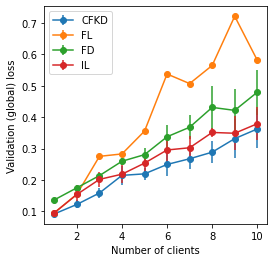

Device: cuda
** Using MNIST **
Load train data...
Load validation data...
Dataset sizes:
	- Train: (1200, 1, 28, 28) (3.7728 MB)
	- Validation (200, 1, 28, 28) (0.6288 MB)
Round 50 done. (0.8s)      
Done.
Device: cuda
** Using MNIST **
Load train data...
Load validation data...
Dataset sizes:
	- Train: (1200, 1, 28, 28) (3.7728 MB)
	- Validation (200, 1, 28, 28) (0.6288 MB)
Round 50 done. (0.6s)      
Done.
Device: cuda
** Using MNIST **
Load train data...
Load validation data...
Dataset sizes:
	- Train: (1200, 1, 28, 28) (3.7728 MB)
	- Validation (200, 1, 28, 28) (0.6288 MB)
Round 50 done. (0.9s)      
Done.
Device: cuda
** Using MNIST **
Load train data...
Load validation data...
Dataset sizes:
	- Train: (1200, 1, 28, 28) (3.7728 MB)
	- Validation (200, 1, 28, 28) (0.6288 MB)
Round 50 done. (0.9s)      
Done.
Device: cuda
** Using MNIST **
Load train data...
Load validation data...
Dataset sizes:
	- Train: (1200, 1, 28, 28) (3.7728 MB)
	- Validation (200, 1, 28, 28) (0.6288 MB)
Roun

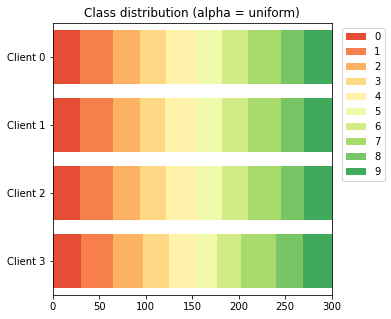

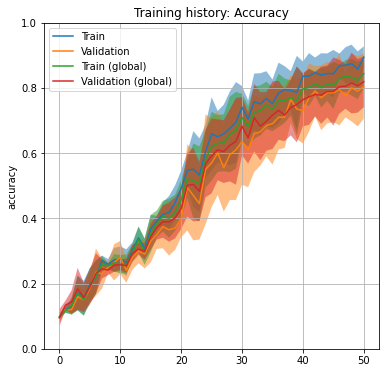

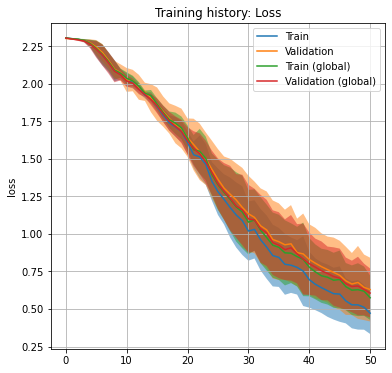

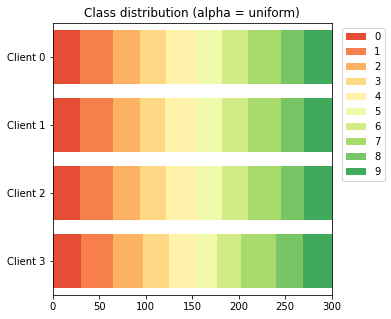

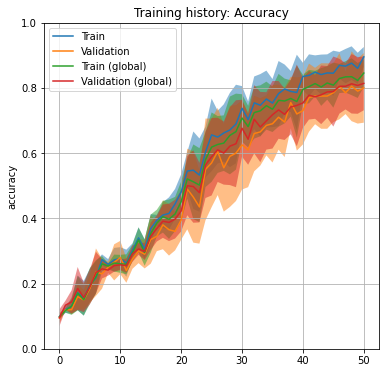

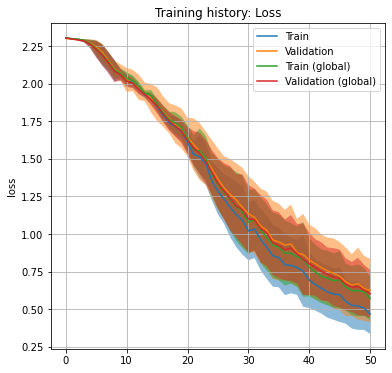

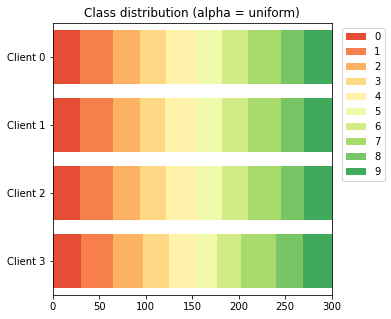

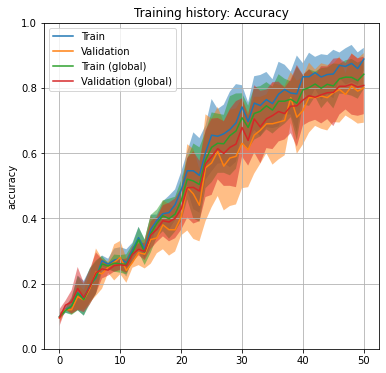

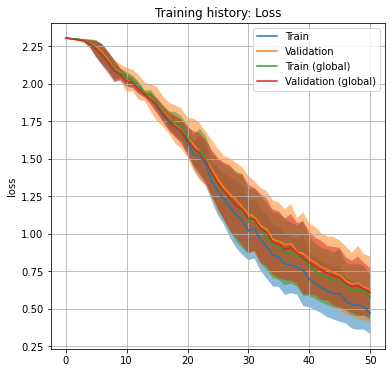

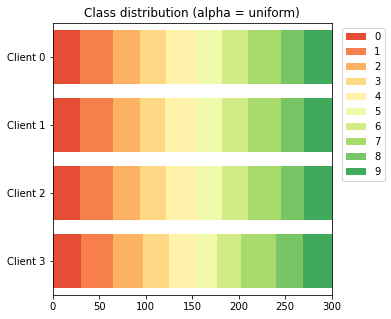

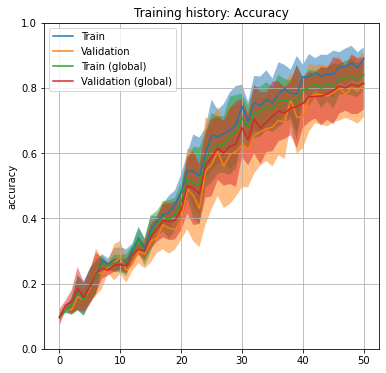

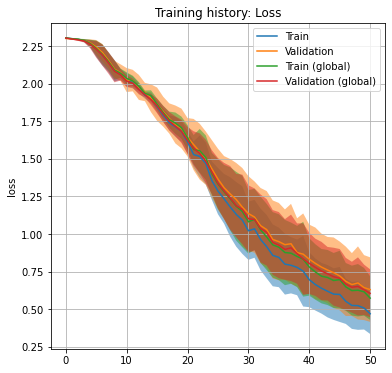

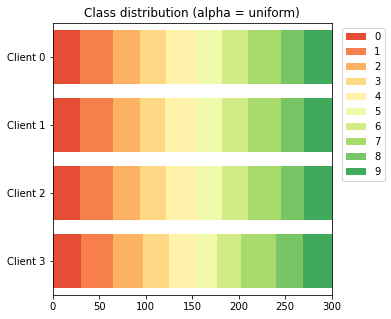

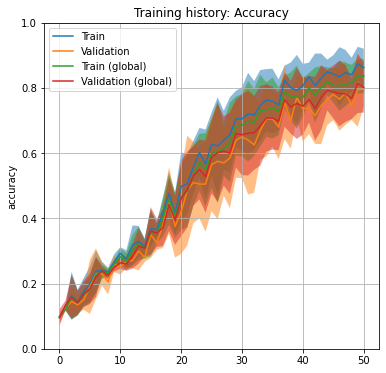

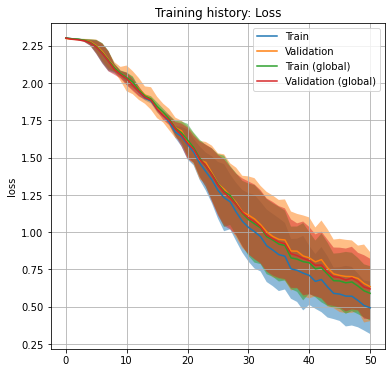

In [69]:
# Test n_avg
n_clients = 4
dataset = "MNIST"
model = "LeNet5"
reduced = 0.02
rounds = 50
track_history = True
export_dir = None
N_AVG = [2, 4, 8, 16, None]

pt_list = []
for n_avg in N_AVG:
    pt = run(n_clients=n_clients, dataset=dataset, model=model, reduced=reduced, 
          n_avg=n_avg, rounds=rounds, track_history=track_history, export_dir=export_dir)
    pt_list.append(pt)

In [71]:
for pt_l in pt_list:
    loss = np.array([pt.perf_histories["Validation (global)"]["accuracy"][-1] for pt in pt_l])
    print(loss.mean(), loss.std())

0.8187499999999999 0.07805246632874585
0.81375 0.0823388577768723
0.8075000000000001 0.08821139382188674
0.81375 0.08018533219984815
0.80125 0.07684196444651838


In [53]:
plt.errorbar(loss.mean)

In [185]:
np.array([pt.perf_histories[evaluation][metric][-1] for pt in pt_kd]).mean()

0.79685

In [186]:
len(pt_kd)

20